We'll be working with a dataset containing news articles from a variety of sources that have been tagged as either fake or real by a fact checking agency. We'll see if we can use this data to build an algorithm that can accurately predict if other articles are fake or real news.

Run the cell below to download the fake news dataset and store it in a dataframe variable.

In [1]:
import pandas as pd
from urllib.request import urlretrieve

link="https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/123/Fake_News_Dataset.csv"

urlretrieve(link, "Fake_News_Dataset.csv")
fake_news_dataset=pd.read_csv("Fake_News_Dataset.csv")

fake_news_dataset.head()

,title,text,subject,Type
0,U.S.-backed forces in Syria's Raqqa say they t...,BEIRUT (Reuters) - The Syrian Democratic Force...,worldnews,Real
1,Ukrainian MP offers more details on alleged pa...,KIEV (Reuters) - A Ukrainian lawmaker on Frida...,politicsNews,Real
2,AWESOME! PRESIDENT TRUMP Shows Off His Strengt...,Obama would have hurt himself doing this (see ...,left-news,Fake
3,#TrumperTantrum: Twitter’s Brilliant Response...,"As you have all probably heard by now, Donald ...",News,Fake
4,HYSTERICAL! DELUSIONAL HILLARY CLAIMS “EPIDEMI...,Hillary Clinton on Thursday decried the spread...,left-news,Fake


Use the "Type" field as the response feature and the "text" field as the predictor feature. Note that this model works better if you don't extract the index column when assigning the response and predictors variables. You can do this by just using [] instead of [[]].

In [2]:
#As the instructions suggest, we use the syntax ["text"] to exclude the ID column
response=fake_news_dataset["Type"]
predictors=fake_news_dataset["text"]

Split the data using 1 as the random_state. Set the test size to 0.20.

In [3]:
#We start by importing the train_test_split function
from sklearn.model_selection import train_test_split

#We then assign the 4 train/test variables using the train_test_split function
#We do this over 2 lines to avoid a horizontal scroll bar
predictors_train, predictors_test,response_train,response_test = train_test_split(
    predictors,response,test_size=0.20,random_state=1)

Train a Multinomial Naive Bayes model.

In [4]:
#First we import the necessary functions
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#Then we make the model
#This uses the make_pipeline function which takes two functions as arguments
#TfidfVectorizer changes our raw text data to a list of word frequencies
#Finally the MultinomialNB function is the function that performs Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
#We then fit the model using the training data
model.fit(predictors_train, response_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

Make predictions using the test data and store them in a variable.

In [5]:
#We call the variable predicted_type
#We use the .predict() method to make predictions on the predictors_test variable
predicted_type = model.predict(predictors_test)

Build a confusion matrix.

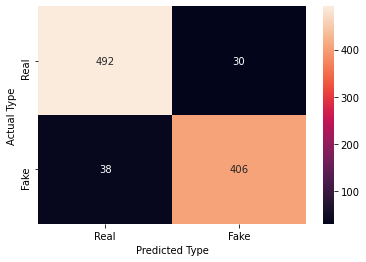

In [6]:
#First we import the necessary functions
from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap
from matplotlib.pyplot import xlabel,ylabel

#We use the confusion_matrix function on the response_test and predicted_type variables
mat = confusion_matrix(response_test, predicted_type)
#We then create a variable called classes that contains the class names (i.e. Real and Fake)
classes = response.unique()

#The heatmap function plots the confusion matrix in a heatmap which is far easier to understand
#the annot argument overlays the confusion matrix values on the squares
#The fmt = "d" argument ensures that the annotations are whole numbers
#The xticklabels and yticklabels arguments are set to the classes variable
heatmap(mat, annot = True, fmt = "d", xticklabels = classes, yticklabels = classes)
#The xlabel and ylabel functions allow us to plot the axis labels
xlabel("Predicted Type")
ylabel("Actual Type");

Build a classification report.

In [7]:
#First we import the classification_report function
from sklearn.metrics import classification_report

#We then use the classification_report on the response_test and predicted_type data
#We then wrap the function in the print function to give a formatted output
#This provides precision and recall scores
#It looks like this model is quite good at identifying fake news
#The high precision means that over 90% of its guesses are accurate
#The high recall shows that almost all fake news is correctly labeled
#Most real news is correctly labeled
#This means that only a few fake news articles will fool this model
#Meanwhile, slightly more real news stories will be misclassified as fake
print(classification_report(response_test, predicted_type))

              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94       522
        Real       0.93      0.91      0.92       444

    accuracy                           0.93       966
   macro avg       0.93      0.93      0.93       966
weighted avg       0.93      0.93      0.93       966



We'll be working with a dataset containing asteroseismology data for a number of different stars spotted by astronomers. You'll help to build a model that astronomers can use to quickly identify if a star is a red giant or a normal star.

Run the cell below to download the asteroseismology dataset and store it in a dataframe variable.

In [8]:
import pandas as pd
from urllib.request import urlretrieve

link="https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/124/asteroseismology_dataset.csv"

urlretrieve(link, "asteroseismology_dataset.csv")
asteroseismology_dataset=pd.read_csv("asteroseismology_dataset.csv")

asteroseismology_dataset.head()

,Type,Dnu,Numax,Epsilon
0,Normal Star,4.44780,43.06289,0.985
1,Red Giant,6.94399,74.07646,0.150
2,Normal Star,2.64571,21.57891,0.855
3,Normal Star,4.24168,32.13189,0.840
4,Red Giant,10.44719,120.37356,0.275


Use the "Type" field as the response feature and the remaining fields as the predictor features.

In [9]:
#We assign the response variable as the Type column
response=asteroseismology_dataset["Type"]
#We use the .drop() method to remove the Type column, leaving behind the predictors
predictors=asteroseismology_dataset.drop("Type",axis=1)

Split the data using 5 as the random_state. Set the test size to 0.25.

In [10]:
#We start by importing the train_test_split function
from sklearn.model_selection import train_test_split

#We then assign the 4 train/test variables using the train_test_split function
#We do this over 2 lines to avoid a horizontal scroll bar
predictors_train, predictors_test,response_train,response_test = train_test_split(
    predictors,response,test_size=0.25,random_state=5)

Train a Gaussian Naive Bayes model.

In [11]:
#First we import the necessary functions
from sklearn.naive_bayes import GaussianNB

#Then we store the function in the model variable
model = GaussianNB()
#We then fit the model using the training data
model.fit(predictors_train, response_train)

GaussianNB()

Make predictions using the test data and store them in a variable.

In [12]:
#We call the variable predicted_type
#We use the .predict() method to make predictions on the predictors_test variable
predicted_type = model.predict(predictors_test)

Build a confusion matrix.

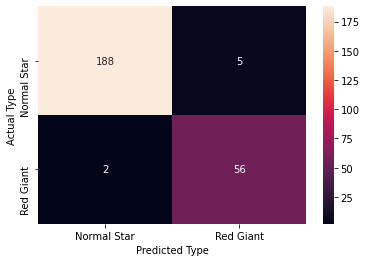

In [13]:
#First we import the necessary functions
from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap
from matplotlib.pyplot import xlabel,ylabel

#We use the confusion_matrix function on the response_test and predicted_type variables
mat = confusion_matrix(response_test, predicted_type)
#We then create a variable called classes that contains the class names (i.e. Real and Fake)
classes = response.unique()

#The heatmap function plots the confusion matrix in a heatmap which is far easier to understand
#the annot argument overlays the confusion matrix values on the squares
#The fmt = "d" argument ensures that the annotations are whole numbers
#The xticklabels and yticklabels arguments are set to the classes variable
heatmap(mat, annot = True, fmt = "d", xticklabels = classes, yticklabels = classes)
#The xlabel and ylabel functions allow us to plot the axis labels
xlabel("Predicted Type")
ylabel("Actual Type");

Build a classification report.

In [14]:
#First we import the classification_report function
from sklearn.metrics import classification_report

#We then use the classification_report on the response_test and predicted_type data
#We then wrap the function in the print function to give a formatted output
#This provides precision and recall scores
#It looks like this model isn't bad, but has some flaws
#The recall figure for Red Giant shows that around 1/3 Red Giants are misclassified
print(classification_report(response_test, predicted_type))

              precision    recall  f1-score   support

 Normal Star       0.99      0.97      0.98       193
   Red Giant       0.92      0.97      0.94        58

    accuracy                           0.97       251
   macro avg       0.95      0.97      0.96       251
weighted avg       0.97      0.97      0.97       251



We'll be working with a dataset containing asteroseismology data for a number of different stars spotted by astronomers. You'll help to build a model that astronomers can use to quickly identify if a star is a red giant or a normal star.

Run the cell below to download the asteroseismology dataset and store it in a dataframe variable.

In [15]:
import pandas as pd
from urllib.request import urlretrieve

link="https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/124/asteroseismology_dataset.csv"

urlretrieve(link, "asteroseismology_dataset.csv")
asteroseismology_dataset=pd.read_csv("asteroseismology_dataset.csv")

asteroseismology_dataset.head()

,Type,Dnu,Numax,Epsilon
0,Normal Star,4.44780,43.06289,0.985
1,Red Giant,6.94399,74.07646,0.150
2,Normal Star,2.64571,21.57891,0.855
3,Normal Star,4.24168,32.13189,0.840
4,Red Giant,10.44719,120.37356,0.275


Use the "Type" field as the response feature and the remaining fields as the predictor features.

In [16]:
#We assign the response variable as the Type column
response=asteroseismology_dataset["Type"]
#We use the .drop() method to remove the Type column, leaving behind the predictors
predictors=asteroseismology_dataset.drop("Type",axis=1)

Split the data using 15 as the random_state. Set the test size to 0.15.

In [17]:
#We start by importing the train_test_split function
from sklearn.model_selection import train_test_split

#We then assign the 4 train/test variables using the train_test_split function
#We do this over 2 lines to avoid a horizontal scroll bar
predictors_train, predictors_test,response_train,response_test = train_test_split(
    predictors,response,test_size=0.15,random_state=15)

Train a Support Vector Machines model. No need to specify arguments as we can't tell how they'll affect the performance until we've examined the results.

In [18]:
#First we import the required function
from sklearn.svm import SVC

#Initially this model has no arguments
#After fine tuning we can see that we get a much better performance
#We can do this with a gamma of around 0.5 and a C of around 100
model = SVC(gamma=0.5,C=100)
model.fit(predictors_train, response_train)

SVC(C=100, gamma=0.5)

Make predictions using the test data and store them in a variable.

In [19]:
#We call the variable predicted_type
#We use the .predict() method to make predictions on the predictors_test variable
predicted_type = model.predict(predictors_test)

Build a confusion matrix.

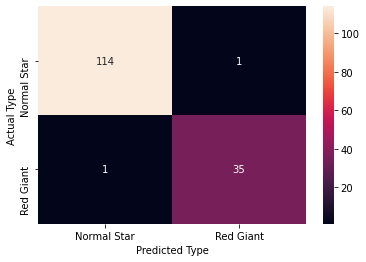

In [20]:
#First we import the necessary functions
from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap
from matplotlib.pyplot import xlabel,ylabel

#We use the confusion_matrix function on the response_test and predicted_type variables
mat = confusion_matrix(response_test, predicted_type)
#We then create a variable called classes that contains the class names (i.e. Real and Fake)
classes = response.unique()

#The heatmap function plots the confusion matrix in a heatmap which is far easier to understand
#the annot argument overlays the confusion matrix values on the squares
#The fmt = "d" argument ensures that the annotations are whole numbers
#The xticklabels and yticklabels arguments are set to the classes variable
heatmap(mat, annot = True, fmt = "d", xticklabels = classes, yticklabels = classes)
#The xlabel and ylabel functions allow us to plot the axis labels
xlabel("Predicted Type")
ylabel("Actual Type");

Build a classification report. Iterate the values for gamma and C in your model above to find the optimal values in this report.

In [21]:
#First we import the classification_report function
from sklearn.metrics import classification_report

#We then use the classification_report on the response_test and predicted_type data
#We then wrap the function in the print function to give a formatted output
#After adjusting C and gamma, this model is very effective
#Unlike the lessons, the SVM model is far better than Gaussian Naive Bayes when used on this dataset
#Precision and Recall are very high across the board
print(classification_report(response_test, predicted_type))

              precision    recall  f1-score   support

 Normal Star       0.99      0.99      0.99       115
   Red Giant       0.97      0.97      0.97        36

    accuracy                           0.99       151
   macro avg       0.98      0.98      0.98       151
weighted avg       0.99      0.99      0.99       151

